## Отчет об экспериментальном анализе реализаций CFPQ-алгоритмов

***
Автор: Погожельская Влада

2 ноября 2020
***

#### Исходные данные:

Датасеты MemoryAliases, FullGraph, WorstCase. В результаты не был включен датасет SparseGraph, так как ожидание окончания работы алгоритмов на нем превосходило разумные пределы.
Измерения проводились на грамматиках g1 и g2.

#### Оборудование:

Замеры производились на ноутбуке с процессором 1,4ГГц, 4‑ядерный Intel Core i5 8‑го поколения, 128МБ  eDRAM, 8ГБ LPDDR3 2133 МГц RAM

OC: macOS Catalina 10.15.7

RAM, выделенная для Docker: 6Gb, swap: 4Gb

#### Ход эксперимента:

Замеры производились для следующих алгоритмов:
* Hellings на ОНФХ (hellings)
* Матричный на ОНФХ (mxm_cfpq)
* Тензорный на ОНФХ (tensor_cfg_cfpq)
* Тензорный на исходной грамматике (tensor_rsa_cfpq)

Так как тестовый запуск алгоритмов показал, что разница во времени их работы значительная, запуск каждого алгоритма для
каждой пары граф-грамматика проводился 1-2 раза, замеры производились в наносекундах, которые позже
были переведены в милисекунды. Время работы и контрольные суммы записывались в CSV файлы, которые далее были анализированы
в Jupiter Notebook.

Далее представлена результирующая таблица с контрольными суммами по всем замерам.

In [234]:
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
from IPython.core.display import display
warnings.simplefilter('always', category=UserWarning)
sns.set(rc={'figure.figsize':(13,9)})

In [235]:
graphs = ['MemoryAliases', 'FullGraph', 'WorstCase']
files = ['results/' + graph + '.csv' for graph in graphs ]
df = dict()



In [236]:
for graph in graphs:
    df[graph] = pd.read_csv('results/' + graph + '.csv')
    df[graph]['Time (in milliseconds)'] = df[graph]['Time (in microseconds)'] / 1e3
    df[graph] = df[graph].drop(['Time (in microseconds)'], axis=1)
    display(df[graph])
    df[graph] = df[graph].drop(['Control sum'], axis=1)

,Algorithm,Graph,File,Grammar,Control sum,Time (in milliseconds)
0,hellings,MemoryAliases,wc,g1,156,308.449
1,hellings,MemoryAliases,wc,g2,156,210.724
2,hellings,MemoryAliases,gzip,g1,1458,43791.506
3,hellings,MemoryAliases,gzip,g2,1458,48459.662
4,hellings,MemoryAliases,pr,g1,385,3617.273
5,hellings,MemoryAliases,pr,g2,385,3289.057
6,hellings,MemoryAliases,bzip2,g1,315,4975.126
7,hellings,MemoryAliases,bzip2,g2,315,3201.329
8,hellings,MemoryAliases,ls,g1,854,56778.144
9,hellings,MemoryAliases,ls,g2,854,42833.493


,Algorithm,Graph,File,Grammar,Control sum,Time (in milliseconds)
0,hellings,FullGraph,fullgraph_50,g1,2500,306.981
1,hellings,FullGraph,fullgraph_50,g2,2500,56704.971
2,hellings,FullGraph,fullgraph_10,g1,100,1.640
3,hellings,FullGraph,fullgraph_10,g2,100,22.160
4,mxm_cfpq,FullGraph,fullgraph_50,g1,2500,4.848
5,mxm_cfpq,FullGraph,fullgraph_50,g2,2500,23.010
6,mxm_cfpq,FullGraph,fullgraph_10,g1,100,1.510
7,mxm_cfpq,FullGraph,fullgraph_10,g2,100,3.891
8,tensor_cfg_cfpq,FullGraph,fullgraph_50,g1,2500,248.249
9,tensor_cfg_cfpq,FullGraph,fullgraph_50,g2,2500,1460.958


,Algorithm,Graph,File,Grammar,Control sum,Time (in milliseconds)
0,hellings,WorstCase,worstcase_32,g1,272,60.140
1,hellings,WorstCase,worstcase_8,g1,20,1.952
2,hellings,WorstCase,worstcase_4,g1,6,1.439
3,hellings,WorstCase,worstcase_16,g1,72,5.503
4,hellings,WorstCase,worstcase_64,g1,1056,1153.402
5,mxm_cfpq,WorstCase,worstcase_32,g1,272,4.686
6,mxm_cfpq,WorstCase,worstcase_8,g1,20,2.210
7,mxm_cfpq,WorstCase,worstcase_4,g1,6,1.998
8,mxm_cfpq,WorstCase,worstcase_16,g1,72,3.219
9,mxm_cfpq,WorstCase,worstcase_64,g1,1056,8.287


In [237]:
def get_barplot(graph, grammar, order=None):
    cur_df = df[graph][(df[graph]['Graph'] == graph) & (df[graph]['Grammar'] == grammar)]
    if not order:
        order = np.sort(cur_df['File'].unique())
    plot = sns.barplot(x='File', y='Time (in milliseconds)', hue='Algorithm', order=order, data=cur_df)
    plot.set_yscale('log')
    plot.set_title(f'{graph} Graph, Grammar = <{grammar}>')
    plot.set(xlabel='Graph filename', ylabel='Time (in milliseconds)')
    return plot

#### Результаты работы алгоритмов

Результаты замеров для наглядности были преобразованы в графики для каждой пары
класс графов - грамматика. По горизонтальной оси отмечены графы, по вертикальной -- время в милисекундах.

<AxesSubplot:title={'center':'MemoryAliases Graph, Grammar = <g1>'}, xlabel='Graph filename', ylabel='Time (in milliseconds)'>

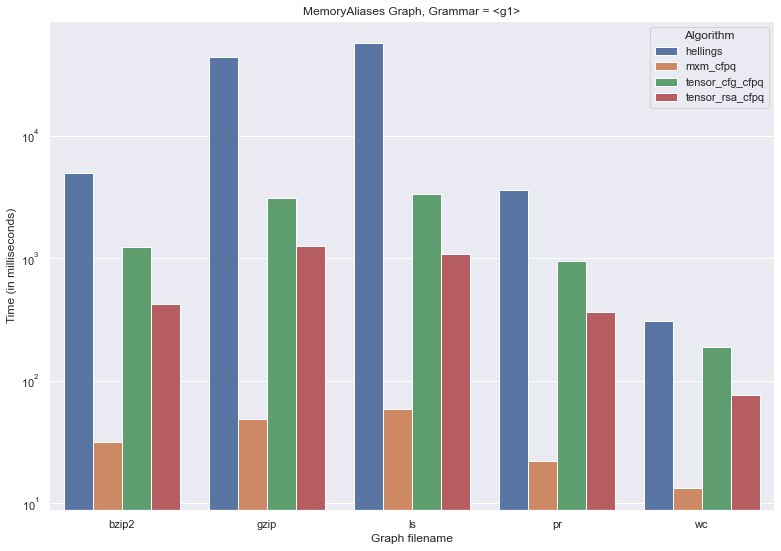

In [238]:
get_barplot('MemoryAliases', 'g1')

<AxesSubplot:title={'center':'MemoryAliases Graph, Grammar = <g2>'}, xlabel='Graph filename', ylabel='Time (in milliseconds)'>

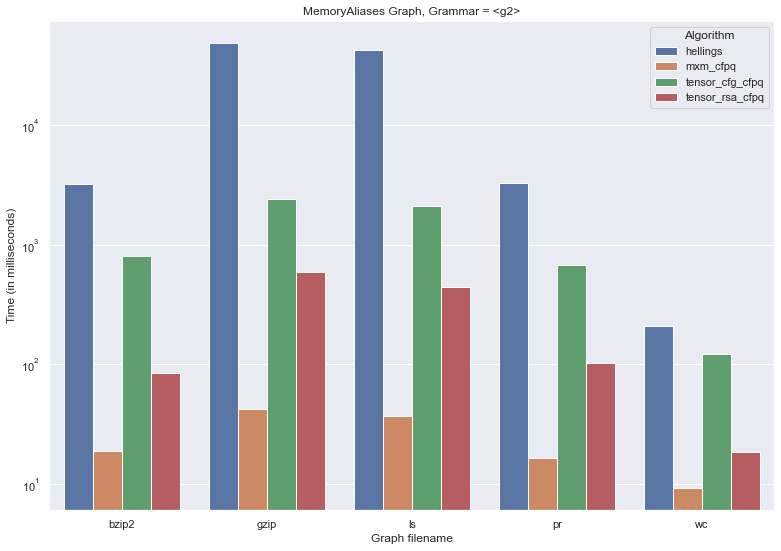

In [239]:
get_barplot('MemoryAliases', 'g2')

<AxesSubplot:title={'center':'FullGraph Graph, Grammar = <g1>'}, xlabel='Graph filename', ylabel='Time (in milliseconds)'>

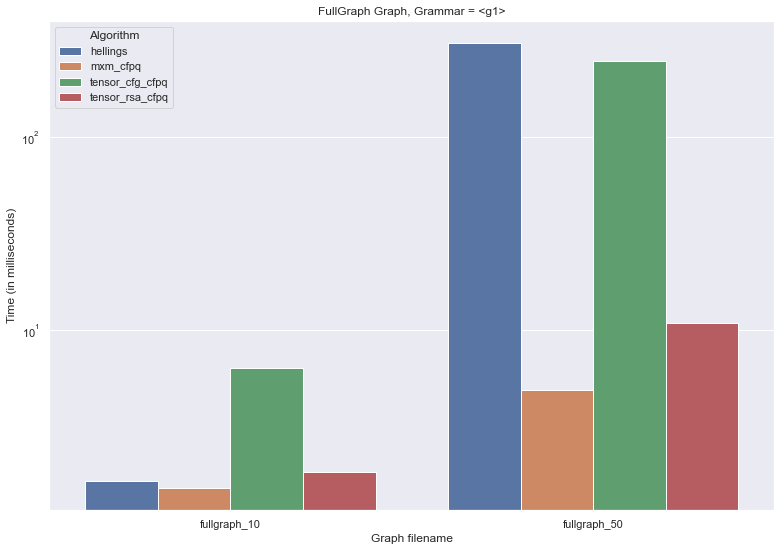

In [240]:
get_barplot('FullGraph', 'g1')

<AxesSubplot:title={'center':'FullGraph Graph, Grammar = <g2>'}, xlabel='Graph filename', ylabel='Time (in milliseconds)'>

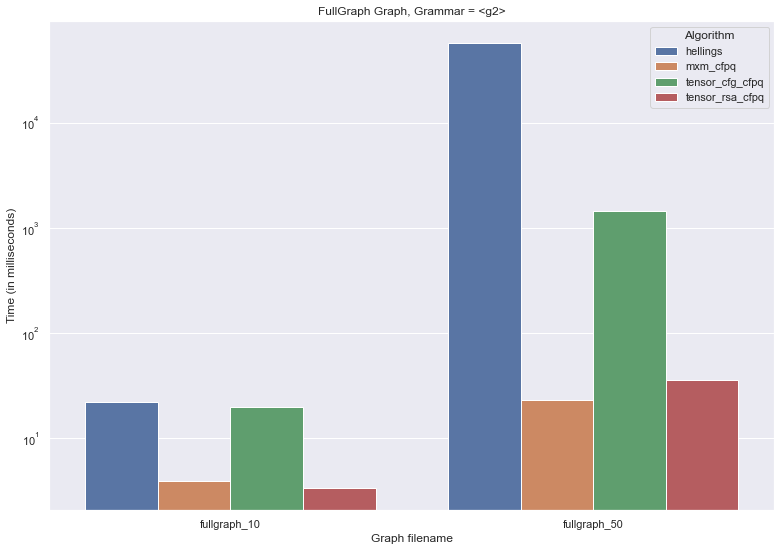

In [241]:
get_barplot('FullGraph', 'g2')

<AxesSubplot:title={'center':'WorstCase Graph, Grammar = <g1>'}, xlabel='Graph filename', ylabel='Time (in milliseconds)'>

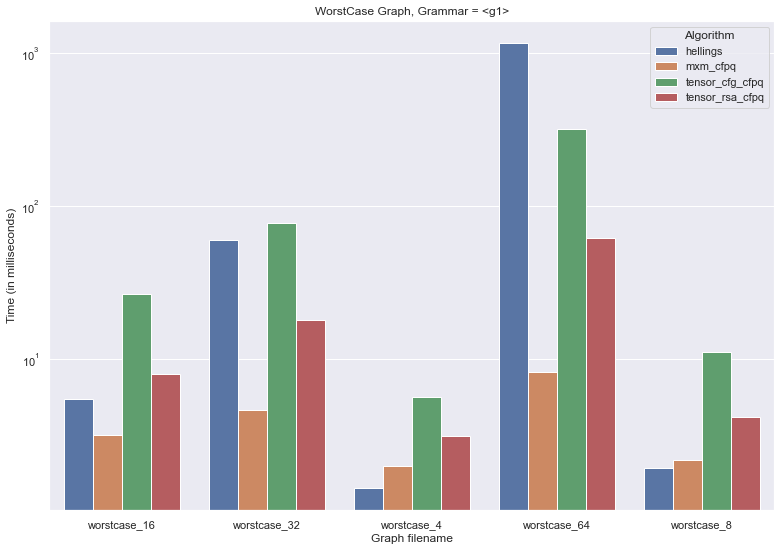

In [242]:
get_barplot('WorstCase', 'g1')

#### Выводы
После визуализации становится понятно, что матричный алгоритм значительно обгоняет остальные алгоритмы на всех классах графов из датасета.
Также стоит заметить, что соотношение работы всех алгоритмов остается неизменным на всех проведенных
экспериментах. Исключением является алгоритм Хеллингса, который обходит другие алгоритмы на самых маленьких графах, однако, по мере же роста вершин в графе данный алгоритм
начинает значительно проигрывать остальным. Тензорные же алгортмы показали сравнительное время работы и в большинстве случаев также сильно проигрывают матричному алгоритму,
 при этом тензорный алгоритм, принимающий на вход грамматику в ОНФХ работает стабильно незначительно медленнее того же алгоритма,
  незатрачивающего времени на дополнительные преобразования и работающего с грамматикой в исходном виде.